In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("DATA/regular-season-cleaned.csv", )

In [7]:
df = pd.read_csv("DATA/2016-2023-cleaned-csv.csv", )
df["team"].unique()

array(['DET', 'ATL', 'CLE', 'CHI', 'NOP', 'GSW', 'PHI', 'BOS', 'BRK',
       'UTA', 'DEN', 'HOU', 'MIN', 'LAL', 'MEM', 'CHO', 'MIA', 'NYK',
       'MIL', 'SAS', 'OKC', 'WAS', 'ORL', 'DAL', 'PHO', 'POR', 'LAC',
       'SAC', 'IND', 'TOR'], dtype=object)

In [98]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
df['date'] = pd.to_datetime(df['date'])

* Some of the advanced columns follow formulas that doesn't fit the purpose of this model, therefore this columns are not beneficals to the model, as saw in the R-part of the project.
* Also the columns of ORB and DRB are also being removed, TRB is the sum of those two, so the values are still represented in the model.
* Some columns are also being removed because are a part of another column.
* The columns of eFG% and TS% are kept because they represent better the ratio of FG, 3P and FT tried in the match.


In [99]:
columns_to_drop = ['FG%', 'FT%', '3P%', '3PAr', 'ORB', 'DRB', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'FTr',
                   'TOV%', 'year', 'month', 'day', 'not_regular_season']
df_lc = df.drop(columns=columns_to_drop)
df_lc.head(3)

,Name,MP,FG,FGA,FT,FTA,TRB,AST,STL,BLK,TOV,PF,PTS,opp,team,season,date,3P,3PA,TS%,eFG%,USG%,ORtg,DRtg,BPM,+/-,season_month,L10_FG,L5_FG_opp,L10_FGA,L5_FGA_opp,L10_3P,L5_3P_opp,L10_3PA,L5_3PA_opp,L10_FT,L5_FT_opp,L10_FTA,L5_FTA_opp,L10_TRB,L5_TRB_opp,L10_AST,L5_AST_opp,L10_STL,L5_STL_opp,L10_BLK,L5_BLK_opp,L10_TOV,L5_TOV_opp,L10_PF,L5_PF_opp,L10_+/-,L5_+/-_opp,L10_TS%,L5_TS%_opp,L10_eFG%,L5_eFG%_opp,L10_USG%,L5_USG%_opp,L10_ORtg,L5_ORtg_opp,L10_DRtg,L5_DRtg_opp,L10_BPM,L5_BPM_opp,L10_PTS,L5_PTS_opp,ppm,L10_ppm,L5_ppm_opp
0,andre_drummond,37.15,6,16,6,10,19,3,1,2,2,4,18,ATL,DET,2016,2015-10-27,0,0,0.441,0.375,23.6,109.0,92.0,2.9,23.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.484522,0.0,0.0
1,marcus_morris,37.08,6,19,5,6,10,4,0,0,0,1,18,ATL,DET,2016,2015-10-27,1,4,0.416,0.342,22.9,119.0,102.0,2.4,17.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.485437,0.0,0.0
2,kentavious_caldwell_pope,37.04,7,14,3,3,4,1,1,0,2,1,21,ATL,DET,2016,2015-10-27,4,7,0.685,0.643,18.3,132.0,101.0,6.3,17.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.566955,0.0,0.0


Following the feature engineering made in R, I'll create a Rest Days column, except that this time I'll work with categorical variables. The average rest days in NBA is two days, when a player plays in consecutive days, the second game will be categorized with "low" and everything above 2 days of rest will be considered "big" quantity of rest.

In [100]:
df_lc['Rest Days'] = df_lc.groupby('Name')['date'].diff().dt.days

def rest_days_to_categorical(qtd_days):
    if qtd_days == 2:
        return 'avg'
    elif qtd_days == 1:
        return 'low'
    return 'big'


df_lc['Rest Days'] = df_lc['Rest Days'].apply(lambda x: rest_days_to_categorical(x))
df_lc = df_lc.drop(columns="date")

The rolling median was calculated using the code on R/04- File. I prefer the way R approaches rolling() instead of pandas rolling().

In [101]:
columns_to_drop2 = ["season", "FG", "FGA", "3P", "3PA", "FT", "FTA", "TRB", "AST", "STL", "BLK", "TOV", "PF",
                    "+/-", "TS%", "eFG%", "USG%", "ORtg", "DRtg", "BPM", 'ppm']

In [102]:
je = df_lc.loc[df_lc['Name'] == 'trae_young'].copy()
je.dropna(inplace=True)
je.head(5)

,Name,MP,FG,FGA,FT,FTA,TRB,AST,STL,BLK,TOV,PF,PTS,opp,team,season,3P,3PA,TS%,eFG%,USG%,ORtg,DRtg,BPM,+/-,season_month,L10_FG,L5_FG_opp,L10_FGA,L5_FGA_opp,L10_3P,L5_3P_opp,L10_3PA,L5_3PA_opp,L10_FT,L5_FT_opp,L10_FTA,L5_FTA_opp,L10_TRB,L5_TRB_opp,L10_AST,L5_AST_opp,L10_STL,L5_STL_opp,L10_BLK,L5_BLK_opp,L10_TOV,L5_TOV_opp,L10_PF,L5_PF_opp,L10_+/-,L5_+/-_opp,L10_TS%,L5_TS%_opp,L10_eFG%,L5_eFG%_opp,L10_USG%,L5_USG%_opp,L10_ORtg,L5_ORtg_opp,L10_DRtg,L5_DRtg_opp,L10_BPM,L5_BPM_opp,L10_PTS,L5_PTS_opp,ppm,L10_ppm,L5_ppm_opp,Rest Days
78417,trae_young,33.13,5,14,3,4,6,5,0,0,4,4,14,NYK,ATL,2019,1,5,0.444,0.393,23.5,83.0,114.0,-10.7,-20.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.422578,0.000000,0.0,big
78650,trae_young,33.08,7,18,2,3,2,9,1,1,3,2,20,MEM,ATL,2019,4,9,0.518,0.500,27.5,111.0,125.0,0.0,-11.0,1.0,5.0,0.0,14.0,0.0,1.0,0.0,5.0,0.0,3.0,0.0,4.0,0.0,6.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,-20.0,0.0,0.444,0.0,0.3930,0.0,23.5,0.0,83.0,0.0,114.0,0.0,-10.70,0.0,14.0,0.0,0.604595,0.422578,0.0,avg
79024,trae_young,37.66,13,23,3,3,2,11,1,0,1,2,35,CLE,ATL,2019,6,14,0.720,0.696,27.3,152.0,110.0,10.1,19.0,1.0,6.0,0.0,16.0,0.0,2.5,0.0,7.0,0.0,2.5,0.0,3.5,0.0,4.0,0.0,7.0,0.0,0.5,0.0,0.5,0.0,3.5,0.0,3.0,0.0,-15.5,0.0,0.481,0.0,0.4465,0.0,25.5,0.0,97.0,0.0,119.5,0.0,-5.35,0.0,17.0,0.0,0.929368,0.513586,0.0,avg
79381,trae_young,25.58,3,12,10,13,4,5,0,1,5,4,17,DAL,ATL,2019,1,3,0.480,0.292,35.6,90.0,99.0,-6.6,-6.0,1.0,7.0,0.0,18.0,0.0,4.0,0.0,9.0,0.0,3.0,0.0,3.0,0.0,2.0,0.0,9.0,0.0,1.0,0.0,0.0,0.0,3.0,0.0,2.0,0.0,-11.0,0.0,0.518,0.0,0.5000,0.0,27.3,0.0,111.0,0.0,114.0,0.0,0.00,0.0,20.0,0.0,0.664582,0.604595,0.0,big
79857,trae_young,30.43,3,12,7,9,3,4,2,0,5,0,13,CHI,ATL,2019,0,6,0.407,0.250,28.5,74.0,97.0,-6.8,-21.0,1.0,6.0,0.0,16.0,0.0,2.5,0.0,7.0,0.0,3.0,0.0,3.5,0.0,3.0,0.0,7.0,0.0,0.5,0.0,0.5,0.0,3.5,0.0,3.0,0.0,-8.5,0.0,0.499,0.0,0.4465,0.0,27.4,0.0,100.5,0.0,112.0,0.0,-3.30,0.0,18.5,0.0,0.427210,0.634588,0.0,big


In [103]:
columns_to_convert = ['opp', 'team', 'season', 'season_month', 'Rest Days']
je[columns_to_convert] = je[columns_to_convert].astype('category')

In [104]:
je_dropped = je.drop(columns=columns_to_drop2)
je_dropped= je_dropped.drop(columns=['Name','MP','team','opp','season_month'])
je_dropped

,PTS,L10_FG,L5_FG_opp,L10_FGA,L5_FGA_opp,L10_3P,L5_3P_opp,L10_3PA,L5_3PA_opp,L10_FT,L5_FT_opp,L10_FTA,L5_FTA_opp,L10_TRB,L5_TRB_opp,L10_AST,L5_AST_opp,L10_STL,L5_STL_opp,L10_BLK,L5_BLK_opp,L10_TOV,L5_TOV_opp,L10_PF,L5_PF_opp,L10_+/-,L5_+/-_opp,L10_TS%,L5_TS%_opp,L10_eFG%,L5_eFG%_opp,L10_USG%,L5_USG%_opp,L10_ORtg,L5_ORtg_opp,L10_DRtg,L5_DRtg_opp,L10_BPM,L5_BPM_opp,L10_PTS,L5_PTS_opp,L10_ppm,L5_ppm_opp,Rest Days
78417,14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.000,0.0000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.000000,0.000000,big
78650,20,5.0,0.0,14.0,0.0,1.0,0.0,5.0,0.0,3.0,0.0,4.0,0.0,6.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,-20.0,0.0,0.4440,0.000,0.3930,0.000,23.5,0.0,83.0,0.0,114.0,0.0,-10.70,0.0,14.0,0.0,0.422578,0.000000,avg
79024,35,6.0,0.0,16.0,0.0,2.5,0.0,7.0,0.0,2.5,0.0,3.5,0.0,4.0,0.0,7.0,0.0,0.5,0.0,0.5,0.0,3.5,0.0,3.0,0.0,-15.5,0.0,0.4810,0.000,0.4465,0.000,25.5,0.0,97.0,0.0,119.5,0.0,-5.35,0.0,17.0,0.0,0.513586,0.000000,avg
79381,17,7.0,0.0,18.0,0.0,4.0,0.0,9.0,0.0,3.0,0.0,3.0,0.0,2.0,0.0,9.0,0.0,1.0,0.0,0.0,0.0,3.0,0.0,2.0,0.0,-11.0,0.0,0.5180,0.000,0.5000,0.000,27.3,0.0,111.0,0.0,114.0,0.0,0.00,0.0,20.0,0.0,0.604595,0.000000,big
79857,13,6.0,0.0,16.0,0.0,2.5,0.0,7.0,0.0,3.0,0.0,3.5,0.0,3.0,0.0,7.0,0.0,0.5,0.0,0.5,0.0,3.5,0.0,3.0,0.0,-8.5,0.0,0.4990,0.000,0.4465,0.000,27.4,0.0,100.5,0.0,112.0,0.0,-3.30,0.0,18.5,0.0,0.634588,0.000000,big
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196925,28,8.5,8.0,17.5,17.0,2.0,3.0,5.0,6.0,7.5,10.0,8.0,11.0,3.0,4.0,10.0,8.0,2.0,0.0,0.0,0.0,4.0,4.0,1.0,2.0,-0.5,0.0,0.5735,0.624,0.5035,0.469,30.3,33.5,121.0,111.0,120.0,122.0,5.45,-0.1,25.0,28.0,0.764206,0.810811,avg
196951,35,8.5,9.0,17.5,25.0,2.0,2.0,5.5,7.0,7.5,5.0,8.0,6.0,2.5,4.0,9.5,9.0,2.0,1.0,0.0,0.0,4.0,4.0,1.5,1.0,-0.5,-5.0,0.5890,0.527,0.5085,0.423,29.7,37.2,123.0,108.0,120.0,115.0,5.45,5.9,26.5,27.0,0.820015,0.815439,low
197277,41,9.0,10.0,17.5,18.0,2.5,6.0,5.5,10.0,7.0,11.0,8.0,13.0,3.0,5.0,9.5,11.0,2.0,1.0,0.0,0.0,3.5,5.0,2.0,1.0,-0.5,11.0,0.5955,0.729,0.5275,0.565,30.3,35.4,126.5,132.0,120.0,113.0,8.40,8.3,28.0,37.0,0.854839,1.022055,avg
197843,25,10.0,8.0,18.5,20.0,2.5,3.0,5.0,8.0,7.0,7.0,8.0,8.0,3.0,3.0,9.0,14.0,1.5,1.0,0.0,0.0,4.0,4.0,2.0,2.0,-0.5,-8.0,0.6325,0.585,0.5460,0.464,33.5,31.4,130.0,120.0,123.5,117.0,8.40,2.9,29.5,28.0,0.882406,0.689497,big


In [105]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from math import sqrt

In [106]:
cat_columns = ['Rest Days']

je_dummies = pd.get_dummies(je_dropped, columns=cat_columns)
je_dummies['target'] = je_dummies['PTS'].apply(lambda x: 1 if x > 24.5 else 0)
je_dummies = je_dummies.drop(columns=['PTS'])
je_dummies

,L10_FG,L5_FG_opp,L10_FGA,L5_FGA_opp,L10_3P,L5_3P_opp,L10_3PA,L5_3PA_opp,L10_FT,L5_FT_opp,L10_FTA,L5_FTA_opp,L10_TRB,L5_TRB_opp,L10_AST,L5_AST_opp,L10_STL,L5_STL_opp,L10_BLK,L5_BLK_opp,L10_TOV,L5_TOV_opp,L10_PF,L5_PF_opp,L10_+/-,L5_+/-_opp,L10_TS%,L5_TS%_opp,L10_eFG%,L5_eFG%_opp,L10_USG%,L5_USG%_opp,L10_ORtg,L5_ORtg_opp,L10_DRtg,L5_DRtg_opp,L10_BPM,L5_BPM_opp,L10_PTS,L5_PTS_opp,L10_ppm,L5_ppm_opp,Rest Days_avg,Rest Days_big,Rest Days_low,target
78417,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.000,0.0000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.000000,0.000000,False,True,False,0
78650,5.0,0.0,14.0,0.0,1.0,0.0,5.0,0.0,3.0,0.0,4.0,0.0,6.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,-20.0,0.0,0.4440,0.000,0.3930,0.000,23.5,0.0,83.0,0.0,114.0,0.0,-10.70,0.0,14.0,0.0,0.422578,0.000000,True,False,False,0
79024,6.0,0.0,16.0,0.0,2.5,0.0,7.0,0.0,2.5,0.0,3.5,0.0,4.0,0.0,7.0,0.0,0.5,0.0,0.5,0.0,3.5,0.0,3.0,0.0,-15.5,0.0,0.4810,0.000,0.4465,0.000,25.5,0.0,97.0,0.0,119.5,0.0,-5.35,0.0,17.0,0.0,0.513586,0.000000,True,False,False,1
79381,7.0,0.0,18.0,0.0,4.0,0.0,9.0,0.0,3.0,0.0,3.0,0.0,2.0,0.0,9.0,0.0,1.0,0.0,0.0,0.0,3.0,0.0,2.0,0.0,-11.0,0.0,0.5180,0.000,0.5000,0.000,27.3,0.0,111.0,0.0,114.0,0.0,0.00,0.0,20.0,0.0,0.604595,0.000000,False,True,False,0
79857,6.0,0.0,16.0,0.0,2.5,0.0,7.0,0.0,3.0,0.0,3.5,0.0,3.0,0.0,7.0,0.0,0.5,0.0,0.5,0.0,3.5,0.0,3.0,0.0,-8.5,0.0,0.4990,0.000,0.4465,0.000,27.4,0.0,100.5,0.0,112.0,0.0,-3.30,0.0,18.5,0.0,0.634588,0.000000,False,True,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196925,8.5,8.0,17.5,17.0,2.0,3.0,5.0,6.0,7.5,10.0,8.0,11.0,3.0,4.0,10.0,8.0,2.0,0.0,0.0,0.0,4.0,4.0,1.0,2.0,-0.5,0.0,0.5735,0.624,0.5035,0.469,30.3,33.5,121.0,111.0,120.0,122.0,5.45,-0.1,25.0,28.0,0.764206,0.810811,True,False,False,1
196951,8.5,9.0,17.5,25.0,2.0,2.0,5.5,7.0,7.5,5.0,8.0,6.0,2.5,4.0,9.5,9.0,2.0,1.0,0.0,0.0,4.0,4.0,1.5,1.0,-0.5,-5.0,0.5890,0.527,0.5085,0.423,29.7,37.2,123.0,108.0,120.0,115.0,5.45,5.9,26.5,27.0,0.820015,0.815439,False,False,True,1
197277,9.0,10.0,17.5,18.0,2.5,6.0,5.5,10.0,7.0,11.0,8.0,13.0,3.0,5.0,9.5,11.0,2.0,1.0,0.0,0.0,3.5,5.0,2.0,1.0,-0.5,11.0,0.5955,0.729,0.5275,0.565,30.3,35.4,126.5,132.0,120.0,113.0,8.40,8.3,28.0,37.0,0.854839,1.022055,True,False,False,1
197843,10.0,8.0,18.5,20.0,2.5,3.0,5.0,8.0,7.0,7.0,8.0,8.0,3.0,3.0,9.0,14.0,1.5,1.0,0.0,0.0,4.0,4.0,2.0,2.0,-0.5,-8.0,0.6325,0.585,0.5460,0.464,33.5,31.4,130.0,120.0,123.5,117.0,8.40,2.9,29.5,28.0,0.882406,0.689497,False,True,False,1


In [107]:
X = je_dummies.drop(columns=['target'])  
y = je_dummies['target']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train.shape, X_test.shape

((240, 45), (104, 45))

In [120]:
rf_model = RandomForestClassifier(n_estimators=150, max_depth=4, bootstrap = True, min_samples_leaf=2,
                                 min_samples_split = 4, random_state=42)

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy*100:.2f}%")


Accuracy: 53.85%


In [124]:
feature_importances = rf_model.feature_importances_

feature_names = je_dummies.drop(columns=['target']).columns

importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

importance_df

,Feature,Importance
2,L10_FGA,0.088835
30,L10_USG%,0.079488
0,L10_FG,0.078838
38,L10_PTS,0.078039
8,L10_FT,0.074545
14,L10_AST,0.045976
36,L10_BPM,0.041680
10,L10_FTA,0.036886
40,L10_ppm,0.035257
26,L10_TS%,0.030777


In [110]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping


In [111]:
model = Sequential()
model.add(Dense(640, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(320, activation='relu'))
model.add(Dense(160, activation='relu'))
model.add(Dense(80, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0, validation_data=(X_test, y_test), callbacks=[early_stopping])

y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)  

accuracy = accuracy_score(y_test, y_pred_binary)

print(f"Accuracy: {accuracy*100:.2f}%")

4/4 [==============================] - 0s 1ms/step
Accuracy: 57.69%


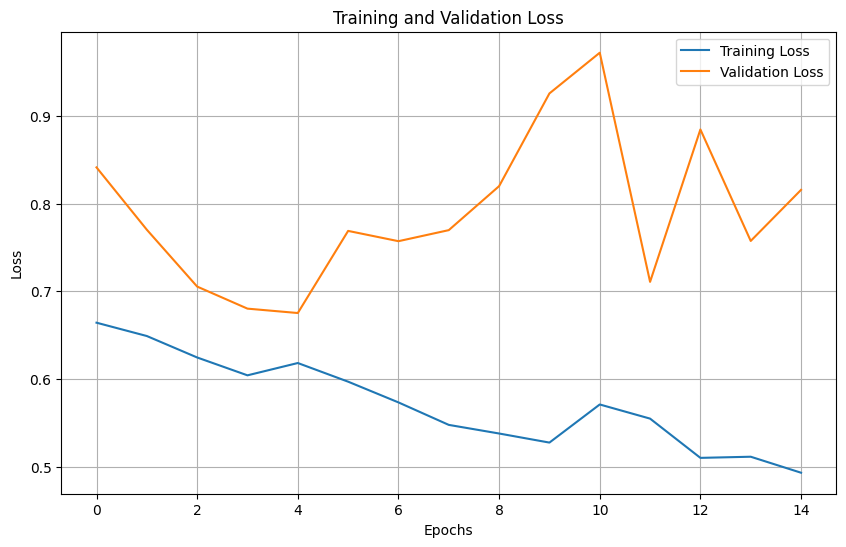

In [112]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()